In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST(root = "./dataset", train=True, transform=transforms.ToTensor(), download=True)
test = datasets.MNIST(root = "./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_dataloader = DataLoader(train, batch_size=100, shuffle=True) 
test_dataloader = DataLoader(test, batch_size=1000, shuffle=False) 

t_size = max(train.targets) - min(train.targets) + 1
print("라벨 종류 : {}".format(t_size))

라벨 종류 : 10


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
e = 0

F = nn.Sequential(
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
)
F = F.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(F.parameters(), lr = 0.1)
epoch = 30
prev_acc = 0
acc_cnt = 0

for e in range(epoch) :
    loss_sum = 0
    for x, t in train_dataloader :
        #y = F(x)
        x = x.to(device)
        t = t.to(device)
        x = x.reshape(x.shape[0],28*28)
        y = F(x)
        #손실함수
        loss = loss_function(y, t)
        loss_sum += loss
        #최적화함수
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    loss_sum /= len(train_dataloader)

    correct = 0
    total = 0
    for x, t in test_dataloader :
        x = x.to(device)
        t = t.to(device)
        x = x.reshape(x.shape[0],28*28)
        with torch.no_grad() :
            y = F(x)
        for i in range(len(x)) :
            if torch.argmax(y[i]) == t[i] :
                correct += 1
            total += 1
    acc = correct / total
    if acc <= prev_acc + 0.001 :
        acc_cnt += 1
    else :
        acc_cnt = 0
        prev_acc = acc
    
    print(f"epoch {e+1} | loss {loss_sum} | acc {acc}")
    if acc_cnt >= 3 :
        print("train halted")
        break


epoch 1 | loss 0.634114682674408 | acc 0.9174
epoch 2 | loss 0.24464701116085052 | acc 0.9402
epoch 3 | loss 0.17737506330013275 | acc 0.9553
epoch 4 | loss 0.13860207796096802 | acc 0.9618
epoch 5 | loss 0.11381140351295471 | acc 0.966
epoch 6 | loss 0.09550070017576218 | acc 0.9702
epoch 7 | loss 0.0818830356001854 | acc 0.9699
epoch 8 | loss 0.07121201604604721 | acc 0.9738
epoch 9 | loss 0.06211334094405174 | acc 0.9745
epoch 10 | loss 0.05463848263025284 | acc 0.9732
epoch 11 | loss 0.04874127730727196 | acc 0.9743
train halted


In [4]:
correct = 0
total = 0
err = []

for x, t in test_dataloader :
    x.to(device)
    t.to(device)
    x = x.reshape(-1, 28*28)
    y = F(x)
    for i in range(len(x)) :
        if torch.argmax(y[i]) == t[i] :
            correct += 1
        else :
            err.append(total)
        total += 1

print("acc : %f" %(correct / len(test)))
print(err)
torch.save(F,"MNIST.pt")

acc : 0.974300
[149, 241, 247, 259, 290, 320, 321, 381, 445, 448, 582, 610, 619, 646, 659, 691, 707, 720, 810, 813, 844, 900, 938, 951, 962, 1014, 1039, 1044, 1112, 1178, 1181, 1182, 1192, 1194, 1224, 1226, 1232, 1247, 1260, 1299, 1319, 1393, 1395, 1414, 1441, 1444, 1464, 1494, 1500, 1520, 1522, 1527, 1530, 1549, 1553, 1570, 1609, 1621, 1671, 1681, 1709, 1732, 1751, 1754, 1790, 1878, 1901, 1941, 1952, 2004, 2016, 2018, 2044, 2053, 2070, 2098, 2109, 2135, 2182, 2185, 2224, 2272, 2293, 2369, 2381, 2387, 2414, 2422, 2426, 2433, 2488, 2496, 2514, 2582, 2607, 2648, 2654, 2713, 2743, 2863, 2877, 2915, 2921, 2939, 2953, 2995, 3005, 3030, 3073, 3117, 3218, 3289, 3330, 3384, 3405, 3422, 3444, 3503, 3520, 3533, 3558, 3565, 3567, 3575, 3597, 3718, 3767, 3780, 3808, 3811, 3818, 3853, 3869, 3871, 3893, 3906, 3926, 3941, 3968, 4065, 4075, 4078, 4093, 4163, 4201, 4224, 4248, 4255, 4259, 4271, 4289, 4294, 4363, 4425, 4487, 4497, 4534, 4536, 4571, 4601, 4731, 4761, 4807, 4814, 4823, 4838, 4880, 4943, 4

AI의 제안 : 9
정답 : 4


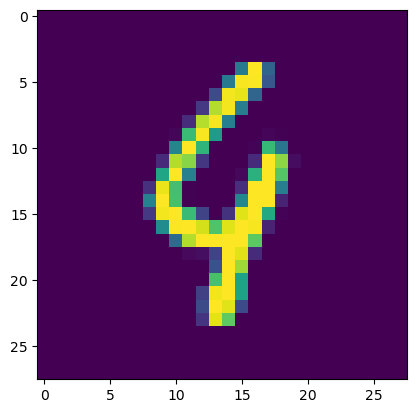

In [7]:
#F = torch.load("MNIST.pt", weights_only = False)
a = 115

img = test[a][0].reshape(28,28)
plt.imshow(img)

y_array = F(img.reshape(1,28*28))
print(f"AI의 제안 : {torch.argmax(y_array)}")
print(f"정답 : {test[a][1]}")